# Customer analysis

In this exercise, you work for a consulting firm as data analyst. One of your clients asked for help to understand its customer buying behavior. 

You dispose of a dataset from its e-commerce website with 13 features : 

- order_id : ID if the order
- order_status : Status of the order
- order_purchase_timestamp : Timestamp of the purchase
- order_delivered_customer_date : Timestamp of the delivery to the customer
- payment_type : Method of payment
- payment_installments : Number of payments for this purchase (does NOT affect the payment value)
- payment_value : Total amount of the payment
- review_score : Score given by the client, ranges from 1 to 5
- customer_unique_id : ID of the customer who purchased
- customer_zip_code_prefix : Zip code of the customer
- customer_city : City of the customer
- customer_state : State of the customer
- product_category_name_english : Name of the product category in English

With this data, you have to analyze customer behavior with two techniques:

- Customer segmentation with RFM
- Cohort analysis from Sept 2016 to October 2018.

At the end, you have to present your analysis with actionable insights to improve the customer relationship of your client. 

# Understanding RFM Segmentation 

❓ What are the 3 metrics used in an RFM Segmentation? (hint : What does RFM stand for?) 

In [1]:
#RFM = Récence, Fréquence et Montant

❓ Can you summarize what each metric measures in one sentence?

In [2]:
#Permet d’identifier ses meilleurs clients, ceux les plus susceptibles de réagir positivement aux sollicitations marketing.

❓ What data / or type of data do you need for each metric ? 

In [3]:
#Recency: customer_unique_id / order_purchase_timestamp :dernier
#Frequency: customer_unique_id / order_id / order_purchase_timestamp: nombre de fois des commandes
#Monetary Value: customer_unique_id / payment_value / order_purchase_timestamp

Let's explore the dataset!

# Exploratory Data Analysis

Load the dataset and start an Exploratory Data Analysis

In [136]:
import pandas as pd
df = pd.read_csv('C:/Users/Simplon/Desktop/Segmentation_clients/db_customers.csv')
df.head()

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto


In [150]:
import seaborn as sns
client=df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False).reset_index
plt.figure(figsize=(10,8))
sns.barplot(x='customer_state',y='customer_unique_id',palette='Greens_d')

ValueError: Could not interpret input 'customer_state'

<Figure size 720x576 with 0 Axes>

In [2]:
df. describe() 

,payment_installments,payment_value,review_score,customer_zip_code_prefix
count,105382.000000,105382.000000,105383.000000,105383.000000
mean,2.866571,154.617262,4.059848,35075.237961
std,2.700955,217.261585,1.367602,29759.375548
min,0.000000,0.000000,1.000000,1003.000000
25%,1.000000,56.930000,4.000000,11349.000000
50%,1.000000,100.120000,5.000000,24360.000000
75%,4.000000,172.847500,5.000000,58423.000000
max,24.000000,13664.080000,5.000000,99990.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       105383 non-null  object 
 1   order_status                   105383 non-null  object 
 2   order_purchase_timestamp       105383 non-null  object 
 3   order_delivered_customer_date  102224 non-null  object 
 4   payment_type                   105382 non-null  object 
 5   payment_installments           105382 non-null  float64
 6   payment_value                  105382 non-null  float64
 7   review_score                   105383 non-null  int64  
 8   customer_unique_id             105383 non-null  object 
 9   customer_zip_code_prefix       105383 non-null  int64  
 10  customer_city                  105383 non-null  object 
 11  customer_state                 105383 non-null  object 
 12  product_category_name_english 

❓ Which features should be formated in datetime ? 
Convert them

In [4]:
#Recence 
from datetime import datetime
df['order_purchase_timestamp'] = df['order_purchase_timestamp'].apply(pd.to_datetime)
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].apply(pd.to_datetime)
df

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_type,payment_installments,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,credit_card,1.0,18.12,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,2.00,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,voucher,1.0,18.59,4,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,boleto,1.0,141.46,4,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,credit_card,3.0,179.12,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,credit_card,3.0,85.08,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,health_beauty
105379,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,credit_card,3.0,195.00,4,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,baby
105380,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,credit_card,5.0,271.01,5,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,home_appliances_2
105381,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,credit_card,4.0,441.16,2,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,computers_accessories


❓ Which features are Categorical ? List the unique values on these features.

In [86]:
df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

In [87]:
df['payment_type'].value_counts()

credit_card    77844
boleto         20066
voucher         5923
debit_card      1546
not_defined        3
Name: payment_type, dtype: int64

In [88]:
df['customer_city'].value_counts()

sao paulo         16483
rio de janeiro     7317
belo horizonte     2918
brasilia           2225
curitiba           1590
                  ...  
rubelita              1
serra bonita          1
rio dos cedros        1
saubara               1
jaguaracu             1
Name: customer_city, Length: 4119, dtype: int64

In [89]:
df['customer_state'].value_counts()

SP    44245
RJ    13744
MG    12286
RS     5792
PR     5324
SC     3797
BA     3656
DF     2236
GO     2157
ES     2129
PE     1747
CE     1410
PA     1023
MT      969
MA      776
MS      751
PB      572
PI      528
RN      527
AL      431
SE      362
TO      302
RO      263
AM      155
AC       85
AP       70
RR       46
Name: customer_state, dtype: int64

In [90]:
df['product_category_name_english'].value_counts()

bed_bath_table               10150
health_beauty                 9174
sports_leisure                8051
computers_accessories         6973
furniture_decor               6856
                             ...  
arts_and_craftmanship           23
la_cuisine                      15
cds_dvds_musicals               12
fashion_childrens_clothes        8
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

❓ Check for missing values. What do you notice ? 


In [91]:
df.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    3159
payment_type                        1
payment_installments                1
payment_value                       1
review_score                        0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name_english    2410
dtype: int64

❓ Can you find an explanation for the missing `order_delivered_customer_date` ? 
(hint : Check for non delivered orders)

In [92]:
df['order_delivered_customer_date'].isnull().sum()
#parce que n'ont pas encore délivrées

3159

❓ What are the proportions of each `order_status` ? 

In [93]:
 df['order_status'].value_counts()

delivered      102225
shipped          1180
canceled          669
unavailable       651
invoiced          330
processing        321
created             5
approved            2
Name: order_status, dtype: int64

❓ Which `order_status` do you think should be removed from the analysis

In [130]:
df_new = df[(df['order_status'] != "delivered") & (df['order_status'] != "shipped")].index
df.drop(df_new , inplace=True)
df['order_status'].value_counts()

delivered    102225
shipped        1180
Name: order_status, dtype: int64

❓ What feature would you choose in the e-commerce dataset provided? 

In [132]:
data_final=df[['order_id','order_purchase_timestamp','order_delivered_customer_date','review_score','customer_unique_id']]

In [96]:
#df_RFM = df[['customer_unique_id','order_id', 'order_purchase_timestamp','payment_value']]

❓ What method would you use to group the data? 

In [19]:
#goup by

❓ What feature would you use to group the data? 

In [20]:
#'customer_unique_id'

Group the data. (Hint: you can carry out the grouping one by one and then merge, or even better use the .agg method and get a robust grouping in one line of code)

What type of data is the R supposed to be? Is it in the right format? (Hint : investigate the difference between `datetime` and `timedelta`) 

In [98]:
from datetime import datetime, timedelta
#timedelta()
#datetime()

So there is one more step to carry out before the data is ready : Calculate the recency base on the date of the purchase

❓ What is the date of the least purchase?

In [133]:
last_date = data_final['order_purchase_timestamp'].min()
last_date

Timestamp('2016-09-04 21:15:19')

❓What is the date of the most recent purchase?

In [134]:
recent_date = data_final['order_purchase_timestamp'].max()
recent_date

Timestamp('2018-09-03 09:06:57')

❓What is the date of the most recent purchase?

In [135]:
most_recent_date = data_final.groupby(['customer_unique_id'])['order_purchase_timestamp'].max()
most_recent_date


customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2   2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f   2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064   2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078   2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255   2017-11-14 19:45:42
                                           ...        
fffcf5a5ff07b0908bd4e2dbc735a684   2017-06-08 21:00:36
fffea47cd6d3cc0a88bd621562a9d061   2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a   2017-02-07 15:49:16
ffff5962728ec6157033ef9805bacc48   2018-05-02 15:17:41
ffffd2657e2aad2907e67c3e9daecbeb   2017-05-02 20:18:45
Name: order_purchase_timestamp, Length: 94399, dtype: datetime64[ns]

In [136]:
from datetime import datetime, timedelta

❓How would you calculate the recency? (hint: what date would you use to compare with the purchase date? Today? probably not...)

In [137]:
from datetime import datetime, timedelta
recens_date = df['order_purchase_timestamp'].max() + timedelta(days=1)
# groupby for the recency 
recency_df = df.groupby(['customer_unique_id'],as_index=False)['order_purchase_timestamp'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
# add columns recency
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (recens_date - x).days)
recency_df.head()

,CustomerID,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,119
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,293


In [138]:
recency_df=recency_df.drop('LastPurchaseDate',axis=1)


In [139]:
recency_df.head()

,CustomerID,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119
2,0000f46a3911fa3c0805444483337064,542
3,0000f6ccb0745a6a4b88665a16c9f078,326
4,0004aac84e0df4da2b147fca70cf8255,293


Create a feature calculating the difference between `the most recent purchased + 1 day`, and `order_purchase_timestamp`.

Now that you have created a new dataset with the right columns, explore it to understand what you created.

❓Which column is the R? The F? The M?

In [140]:
dfAgg=df.groupby(['customer_unique_id']).agg(Montant=pd.NamedAgg(column='payment_value', aggfunc=sum),
                                                 Fréquence=pd.NamedAgg(column='payment_value', aggfunc='count'),
                                                 Paniermoy=pd.NamedAgg(column='payment_value', aggfunc='mean')).reset_index()
dfAgg

,customer_unique_id,Montant,Fréquence,Paniermoy
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,27.19
2,0000f46a3911fa3c0805444483337064,86.22,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,196.89
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,1,2067.42
94395,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,84.58
94396,ffff371b4d645b6ecea244b27531430a,112.46,1,112.46
94397,ffff5962728ec6157033ef9805bacc48,133.69,1,133.69


In [142]:
data_RFM = recency_df.merge(dfAgg, how = 'left', left_on='CustomerID', right_on='customer_unique_id')
data_RFM=data_RFM.drop('customer_unique_id',axis=1)
data_RFM=data_RFM.drop('Paniermoy',axis=1)
data_RFM

,CustomerID,Recency,Montant,Fréquence
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1
2,0000f46a3911fa3c0805444483337064,542,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,452,2067.42,1
94395,fffea47cd6d3cc0a88bd621562a9d061,267,84.58,1
94396,ffff371b4d645b6ecea244b27531430a,573,112.46,1
94397,ffff5962728ec6157033ef9805bacc48,124,133.69,1


In [143]:
data_RFM2=data_RFM.drop('CustomerID',axis=1)
data_RFM2

,Recency,Montant,Fréquence
0,116,141.90,1
1,119,27.19,1
2,542,86.22,1
3,326,43.62,1
4,293,196.89,1
...,...,...,...
94394,452,2067.42,1
94395,267,84.58,1
94396,573,112.46,1
94397,124,133.69,1


Now for each metric independantly, build clutsers (Hint 1: you can use `.describe()` to have insights about each metrics. Hint 2: Don't choose more than 3 clusters)

In [144]:
data_RFM2.describe()

,Recency,Montant,Fréquence
count,94399.000000,94399.000000,94399.000000
mean,242.864162,168.250134,1.095393
std,152.723176,232.880460,0.530316
min,1.000000,0.000000,0.000000
25%,119.000000,63.110000,1.000000
50%,224.000000,108.100000,1.000000
75%,352.000000,184.590000,1.000000
max,729.000000,13664.080000,54.000000


In [57]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(data_RFM2)
model.predict(data_RFM2)
#data_RFM["k"] = model.predict(data_RFM2)
data_RFM

,CustomerID,Recency,Montant,Fréquence
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1
2,0000f46a3911fa3c0805444483337064,542,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1
...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,452,2067.42,1
94395,fffea47cd6d3cc0a88bd621562a9d061,267,84.58,1
94396,ffff371b4d645b6ecea244b27531430a,573,112.46,1
94397,ffff5962728ec6157033ef9805bacc48,124,133.69,1


In [58]:
import matplotlib.pyplot as plt
plt.scatter(data_RFM["Montant"],data_RFM["Recency"], c = data_RFM["k"], cmap = plt.cm.Set1)

KeyError: 'k'

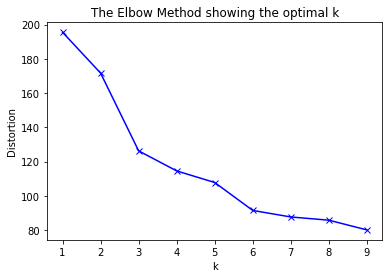

In [59]:
# clustering dataset
# determine k using elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data_RFM2)
    kmeanModel.fit(data_RFM2)
    distortions.append(sum(np.min(cdist(data_RFM2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data_RFM2.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Now that you have clusters for each category, explain the different buying behaviors

In [151]:
#Cluster manuel
# Montant : < 100 et entre 100 et 200 et > 300 / niveau 0 / 1 / 2
# Recency : < 270 et > 270 / Niveau 1 et 2
# Fréquence: < 1 et > 1/ Niveau 1 et 2
#data_RFM['R']=[1 if x < 270 else 2 for x in data_RFM['Recency']]
#data_RFM['F']=[1 if x < 1 else 2 for x in data_RFM['Fréquence']]
#data_RFM['M']=[1 if x < 270 else  2 for x in data_RFM['Montant']]
#data_RFM.head()
data_RFM

,CustomerID,Recency,Montant,Fréquence,M,R,F,RFM Score,seg
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,1,1,2,121,Lambda
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,3,1,2,123,Premium
2,0000f46a3911fa3c0805444483337064,542,86.22,1,1,2,2,221,Fidèle
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,3,2,2,223,Premium
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,1,2,2,221,Fidèle
...,...,...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,452,2067.42,1,1,2,2,221,Fidèle
94395,fffea47cd6d3cc0a88bd621562a9d061,267,84.58,1,1,1,2,121,Lambda
94396,ffff371b4d645b6ecea244b27531430a,573,112.46,1,1,2,2,221,Fidèle
94397,ffff5962728ec6157033ef9805bacc48,124,133.69,1,1,1,2,121,Lambda


In [152]:
def m_score (x):
    if x <= data_RFM['Montant'][200]:
        return 3
    elif x <= data_RFM['Montant'][100]:
        return 2
    else:
        return 1
data_RFM['M'] = data_RFM['Montant'].apply(lambda x: m_score(x))

In [153]:

data_RFM['R']=[1 if x < 270 else 2 for x in data_RFM['Recency']]
data_RFM['F']=[1 if x < 1 else 2 for x in data_RFM['Fréquence']]
data_RFM['M'] = data_RFM['Montant'].apply(lambda x: m_score(x))
data_RFM['RFM Score'] = data_RFM['R'].map(str) + data_RFM['F'].map(str) + data_RFM['M'].map(str)
data_RFM.head()

,CustomerID,Recency,Montant,Fréquence,M,R,F,RFM Score,seg
0,0000366f3b9a7992bf8c76cfdf3221e2,116,141.90,1,1,1,2,121,Lambda
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,27.19,1,3,1,2,123,Premium
2,0000f46a3911fa3c0805444483337064,542,86.22,1,1,2,2,221,Fidèle
3,0000f6ccb0745a6a4b88665a16c9f078,326,43.62,1,3,2,2,223,Premium
4,0004aac84e0df4da2b147fca70cf8255,293,196.89,1,1,2,2,221,Fidèle


(array([4.1250e+04, 0.0000e+00, 1.4539e+04, 0.0000e+00, 0.0000e+00,
        2.8445e+04, 0.0000e+00, 1.0164e+04, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

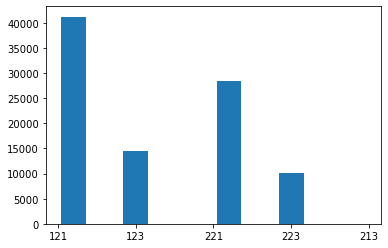

In [147]:
import matplotlib.pyplot as plt
plt.hist(data_RFM['RFM Score'], rwidth=0.8) 

In [148]:
data_RFM['RFM Score'].value_counts(ascending=True)

213        1
223    10164
123    14539
221    28445
121    41250
Name: RFM Score, dtype: int64

In [ ]:
data_RFM['M'] = data_RFM['Montant'].apply(lambda x: m_score(x))

In [154]:
def categ(x):
    if x in["111", "112", "113"]:
        return "Lost"
    elif x in["221", "222"]:
         return "Fidèle"
    elif x in["123", "223"]:
        return "Premium"
    else:
        return "Lambda"

In [150]:
data_RFM['seg'] =data_RFM['RFM Score'].apply(categ)
data_RFM['seg'].value_counts(normalize=True)*100

Lambda     43.698556
Fidèle     30.132734
Premium    26.168709
Name: seg, dtype: float64

(array([41251.,     0.,     0.,     0.,     0., 24703.,     0.,     0.,
            0., 28445.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

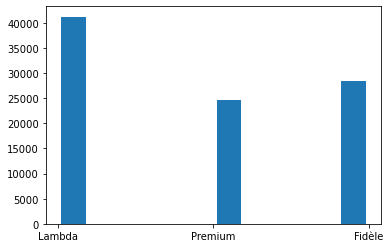

In [156]:
plt.hist(data_RFM['seg'], rwidth=0.8) 

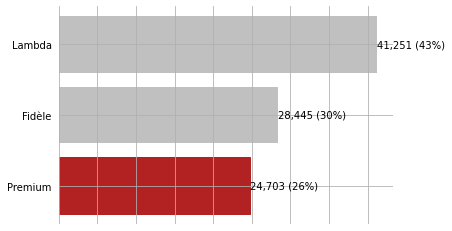

In [161]:
# count the number of customers in each segment
categ_counts = data_RFM['seg'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(categ_counts)),
              categ_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(categ_counts)))
ax.set_yticklabels(categ_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if categ_counts.index[i] in ['Premium']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/categ_counts.sum())),
                va='center',
                ha='left'
               )
plt.grid()
plt.show()


# Working with cohorts

❓What is a cohort? 

In [ ]:
#L'analyse de cohorte est une technique très utile et relativement simple qui permet d'obtenir des
#informations précieuses sur le comportement des clients/utilisateurs de toute entreprise.

❓Why is it interesting to analyse cohorts ? 

In [ ]:
#Il peut fournir des informations sur le cycle de vie du produit et du client.

❓What data (already existing in the original dataset) do we need to build a cohort? 

In [73]:
df.dtypes

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_score                              int64
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
product_category_name_english            object
dtype: object

In [74]:
import pandas as pd
df_cohort=df[["customer_unique_id","order_purchase_timestamp","order_id"]]


Build a new df with just these 3 features

In [75]:
import pandas as pd
df_cohort.head()

,customer_unique_id,order_purchase_timestamp,order_id
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7
3,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d


Using the `pandas.Serie.dt.to_period()` methode, create a new feature converting `order_purchase_timestamp` in months

In [105]:
df_cohort['conv_mois']=df_cohort['order_purchase_timestamp'].dt.to_period("M")
df_cohort.head()

<ipython-input-105-d2c0dbcbaca2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cohort['conv_mois']=df_cohort['order_purchase_timestamp'].dt.to_period("M")


,customer_unique_id,order_purchase_timestamp,order_id,conv_mois
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10
3,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,53cdb2fc8bc7dce0b6741e2150273451,2018-07
4,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,47770eb9100c2d0c44946d9cf07ec65d,2018-08


In [106]:
df_c=df_cohort.copy()

Create a new feature called `cohort` by grouping the previous df by `customer_unique_id`, and tranforming it's minimum value in months (with the same `pandas.Serie.dt.to_period()` as before)

In [107]:
import numpy as np
# For the teachers, To filter by only the customer that have done 2 or more purchases
df_more =pd.DataFrame(df_c.groupby('customer_unique_id').size()[df_c.groupby('customer_unique_id').size() > 1])
df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(columns={0:'na'})

df_c = df_c[df_c['na'].notna()]

In [108]:
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 
df_c

,customer_unique_id,order_purchase_timestamp,order_id,conv_mois,na,cohort
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
1,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
2,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,e481f51cbdc54678b7cc49136f2d6af7,2017-10,4.0,2017-09
11,299905e3934e9e181bfb2e164dd4b4f8,2017-07-29 11:55:02,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
12,299905e3934e9e181bfb2e164dd4b4f8,2017-07-29 11:55:02,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07,2.0,2017-07
...,...,...,...,...,...,...
105367,9e4accf95024aa6565ca1efcadb96752,2018-05-12 13:42:24,19dba6d1e58b04e7fc820558a38ea398,2018-05,2.0,2017-09
105373,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
105374,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 19:57:37,9115830be804184b91f5c00f6f49f92d,2017-10,2.0,2017-10
105375,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 00:30:03,aa04ef5214580b06b10e2a378300db44,2017-01,2.0,2017-01


Now groupby `['cohort', 'order_month']` and aggregate by `nunique()` `customer_unique_id`

In [109]:
df_c = df_c.groupby(['cohort', 'conv_mois']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_c

,cohort,conv_mois,n_customers
0,2016-10,2016-10,25
1,2016-10,2017-04,1
2,2016-10,2017-07,1
3,2016-10,2017-09,1
4,2016-10,2017-11,1
...,...,...,...
217,2018-07,2018-08,44
218,2018-07,2018-09,2
219,2018-08,2018-08,246
220,2018-08,2018-09,7


Finally, create a feature called `['period_number']` where you substract the `cohort` to the `order_month` and get the `'n'` attribute thanks to the `operator.attrgetter` method

In [112]:
from operator import attrgetter
df_c['period_number'] = (df_c.conv_mois- df_c.cohort).apply(attrgetter('n'))
df_c

,cohort,conv_mois,n_customers,period_number
0,2016-10,2016-10,25,0
1,2016-10,2017-04,1,6
2,2016-10,2017-07,1,9
3,2016-10,2017-09,1,11
4,2016-10,2017-11,1,13
...,...,...,...,...
217,2018-07,2018-08,44,1
218,2018-07,2018-09,2,2
219,2018-08,2018-08,246,0
220,2018-08,2018-09,7,1


Explore a cohort (for example 2017-01) and try to understand what it shows

In [116]:
cohort_2017=df_c[df_c.cohort == '2017-01']
cohort_2017

,cohort,conv_mois,n_customers,period_number
11,2017-01,2017-01,81,0
12,2017-01,2017-02,3,1
13,2017-01,2017-03,2,2
14,2017-01,2017-04,1,3
15,2017-01,2017-05,3,4
16,2017-01,2017-06,1,5
17,2017-01,2017-07,4,6
18,2017-01,2017-08,1,7
19,2017-01,2017-09,1,8
20,2017-01,2017-11,3,10


Pivot the DataFrame using the methode : `DataFrame.pivot_table` (hint : use `'cohort'` as `index`, `'period_number'` as columns, and `'n_customers'` as `values`)

In [119]:
df_pivot = df_c.pivot_table(index='cohort',columns='period_number',values='n_customers') 
df_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,25.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,81.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,143.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,229.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,215.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,354.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,285.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN
2017-07,365.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


Now divide all the values (except you column 0) by the column 0 and name this new DataFrame `retention_matrix`

In [124]:
cohort_size = df_pivot.iloc[:,0]
retention_matrix = df_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.040000,NaN,NaN,0.040000,NaN,0.040000,NaN,0.040000,NaN,0.040000,NaN,0.040000,0.080000,0.08
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.037037,0.024691,0.012346,0.037037,0.012346,0.049383,0.012346,0.012346,NaN,0.037037,0.012346,0.074074,0.037037,0.012346,0.012346,0.024691,0.037037,0.012346,NaN
2017-02,1.0,0.027972,0.034965,0.013986,0.048951,0.013986,0.027972,0.020979,0.020979,0.027972,0.013986,0.034965,0.020979,0.020979,0.013986,0.006993,0.006993,0.027972,NaN,NaN
2017-03,1.0,0.056769,0.043668,0.043668,0.039301,0.017467,0.017467,0.034934,0.039301,0.008734,0.043668,0.017467,0.026201,0.013100,0.017467,0.026201,0.008734,0.017467,NaN,NaN
2017-04,1.0,0.065116,0.023256,0.018605,0.037209,0.027907,0.037209,0.032558,0.032558,0.018605,0.027907,0.009302,0.009302,0.004651,0.009302,0.009302,0.023256,NaN,NaN,NaN
2017-05,1.0,0.050847,0.050847,0.039548,0.031073,0.033898,0.042373,0.016949,0.025424,0.031073,0.025424,0.033898,0.025424,0.002825,0.019774,0.025424,NaN,NaN,NaN,NaN
2017-06,1.0,0.052632,0.038596,0.045614,0.028070,0.042105,0.042105,0.024561,0.014035,0.024561,0.035088,0.038596,0.017544,0.014035,0.021053,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.054795,0.038356,0.027397,0.030137,0.021918,0.032877,0.010959,0.019178,0.027397,0.024658,0.032877,0.013699,0.027397,NaN,NaN,NaN,NaN,NaN,NaN


Plot your `retention matrix` using the code below : 

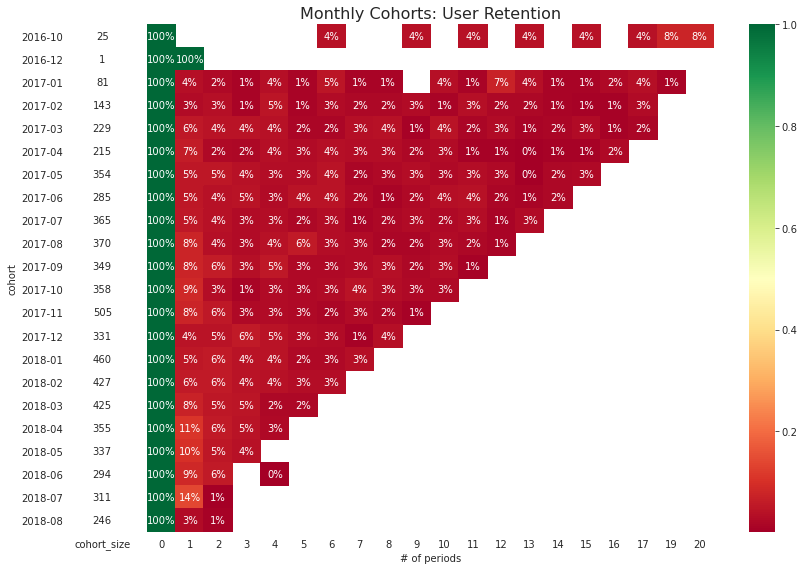

In [125]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


What do you notice? 

How could we have know that before? (hint : Calculate the percentage of customers who have ordered more than once)

In [155]:
#n_orders=df_c[df_c['period_number']>2].sum()

In [154]:
n_orders = df.groupby(['customer_unique_id'])['order_id'].nunique()
orders_perc2 = np.sum(n_orders > 1) / df['customer_unique_id'].nunique()
orders_perc2*100

3.1187562437562435

Here is the code for the analysis of customers who have bought more than once : 

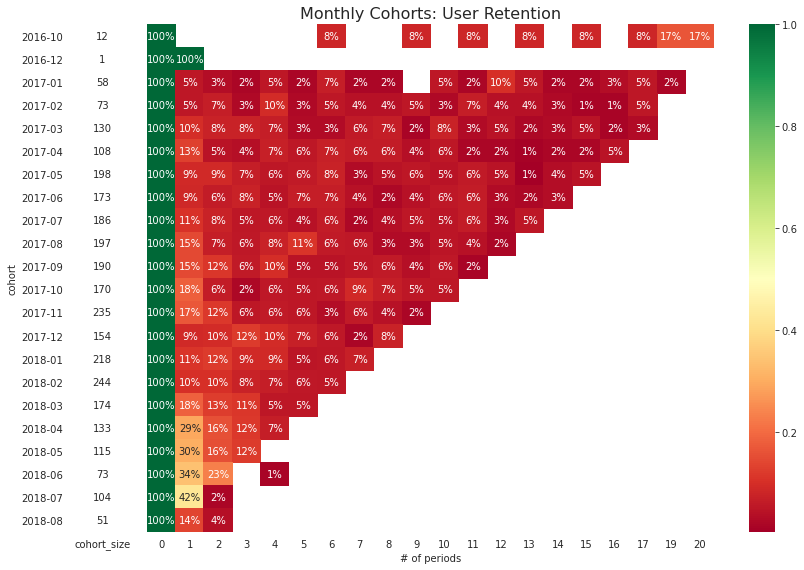

In [127]:
#start from your df created doing the RFM segmentation
df_c = df[['customer_unique_id', 'order_id',
           'order_purchase_timestamp']].drop_duplicates()

df_c['order_month'] = df_c['order_purchase_timestamp'].dt.to_period('M')

df_more = pd.DataFrame(df_c.groupby('customer_unique_id').size()[
                       df_c.groupby('customer_unique_id').size() > 1])

df_c = df_c.merge(df_more, how='left', on='customer_unique_id').rename(
    columns={0: 'na'})

df_c = df_c[df_c['na'].notna()]
df_c['cohort'] = df_c.groupby('customer_unique_id')['order_purchase_timestamp'] \
    .transform('min') \
    .dt.to_period('M')

df_cohort = df_c.groupby(['cohort', 'order_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)
df_cohort['period_number'] = (
    df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index='cohort',
                                     columns='period_number',
                                     values='n_customers')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={
                           'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(
        columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()